# The good ol' import(s)

In [3]:
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import autopep8

In [4]:
from math import pi
from bokeh.io import curdoc, show, output_notebook, reset_output
from bokeh.plotting import figure, ColumnDataSource
from bokeh.models import HoverTool
from bokeh.transform import dodge
from bokeh.core.properties import value
from bokeh.layouts import column

reset_output()
output_notebook()

curdoc().theme = 'dark_minimal'
_tools_to_show = 'box_zoom,pan,save,hover,reset,tap,wheel_zoom'

Loading BokehJS ...

In [5]:
sns.set_palette('rainbow')
plt.style.use("dark_background")

params = {
    'legend.fontsize': 'x-large',
    'figure.figsize': (20, 15),
    'axes.grid': False,
    'axes.labelsize': 'x-large',
    'axes.titlesize': 'x-large',
    'xtick.labelsize': 'x-large',
    'ytick.labelsize': 'x-large'
}

pylab.rcParams.update(params)

In [6]:
df = pd.read_csv('vgsales.csv')

In [7]:
# df.profile_report()

# Dropping nans.

In [8]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [9]:
pd.DataFrame(df.apply(
    lambda x: f"{round((x.isnull().sum()/len(x))*100, 2)}%"), columns=['% Missing'])

,% Missing
Rank,0.0%
Name,0.0%
Platform,0.0%
Year,1.63%
Genre,0.0%
Publisher,0.35%
NA_Sales,0.0%
EU_Sales,0.0%
JP_Sales,0.0%
Other_Sales,0.0%


In [10]:
df = df.dropna(subset=['Year', 'Publisher'])

In [11]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

# Hmmm, dump me some math..!!

In [12]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


# Info please?

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16291 non-null int64
Name            16291 non-null object
Platform        16291 non-null object
Year            16291 non-null float64
Genre           16291 non-null object
Publisher       16291 non-null object
NA_Sales        16291 non-null float64
EU_Sales        16291 non-null float64
JP_Sales        16291 non-null float64
Other_Sales     16291 non-null float64
Global_Sales    16291 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


# On to visualizing this data. Let's go !!

# Global sales by Year.

In [14]:
data = df.groupby('Year')['Global_Sales'].size().reset_index(name='count')
data['Year'] = data['Year'].astype(str)

source = ColumnDataSource(data)

p = figure(x_range=data['Year'], plot_height=500, plot_width=850,
           title="Global Sales by Year", tools=_tools_to_show)

p.vbar(x='Year', top='count', width=0.9, source=source)

p.xgrid.grid_line_color = None
p.xaxis.major_label_orientation = pi/4
p.y_range.start = 0

hover = p.select(dict(type=HoverTool))
hover.tooltips = [("Games Released:", "@count")]

show(p)

# Global sales by platform
>  PlayStation dominating.

In [15]:
data = df.groupby('Platform')['Global_Sales'].sum().reset_index(
    name='Sales').sort_values('Sales', ascending=False)

In [16]:
source = ColumnDataSource(data)

p = figure(x_range=data['Platform'], plot_height=500, plot_width=800,
           title="Sales total by Platform", tools=_tools_to_show)

p.vbar(x='Platform', top='Sales', width=0.9, source=source)

p.xgrid.grid_line_color = None
p.xaxis.major_label_orientation = pi/4
p.y_range.start = 0

hover = p.select(dict(type=HoverTool))
hover.tooltips = [("Platform", "@Platform"), ("Sales", "@Sales M")]

show(p)

# Sales by Genre.

In [17]:
data = df.groupby('Genre')['Global_Sales'].sum().reset_index(
    name='Sales').head(10).sort_values('Sales', ascending=False)

In [18]:
source = ColumnDataSource(data)

p = figure(x_range=data['Genre'], plot_height=500, plot_width=800,
           title="Sales total by Genre", tools=_tools_to_show)

p.vbar(x='Genre', top='Sales', width=0.9, source=source)

p.xgrid.grid_line_color = None
p.xaxis.major_label_orientation = pi/4
p.y_range.start = 0

hover = p.select(dict(type=HoverTool))
hover.tooltips = [("Sales", "@Sales M")]

show(p)

# Sales by Top 10 publishers.

In [19]:
data = df.groupby('Publisher')['Global_Sales'].sum().reset_index(name='Sales')
data = data.sort_values('Sales', ascending=False).head(10)

In [20]:
source = ColumnDataSource(data)

p = figure(x_range=data['Publisher'], plot_height=500, plot_width=850,
           title="Sales total by Publisher", tools=_tools_to_show)

p.vbar(x='Publisher', top='Sales', width=0.9, source=source)

p.xgrid.grid_line_color = None
p.xaxis.major_label_orientation = pi/4
p.y_range.start = 0

hover = p.select(dict(type=HoverTool))
hover.tooltips = [("Sales", "@Sales M")]

show(p)

# Top 10 underperforming games by Top 10 high perfomer publishers.

In [21]:
reverse_df = df.iloc[::-1]

In [22]:
lookup = {x: None for x in data.Publisher.values}
indexes = []

count = 0
for i in reverse_df.index:
    pub, name = reverse_df.at[i, 'Publisher'], reverse_df.at[i, 'Name']

    if pub in lookup and lookup[pub] is None:
        lookup[pub] = name
        indexes.append(i)
        count += 1

    if count == 10:
        break

In [23]:
df.loc[indexes]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.0,0.01
16591,16594,Myst IV: Revelation,PC,2004.0,Adventure,Ubisoft,0.01,0.00,0.00,0.0,0.01
16568,16571,XI Coliseum,PSP,2006.0,Puzzle,Sony Computer Entertainment,0.00,0.00,0.01,0.0,0.01
16567,16570,Fujiko F. Fujio Characters: Great Assembly! Sl...,3DS,2014.0,Action,Namco Bandai Games,0.00,0.00,0.01,0.0,0.01
16558,16561,Pro Evolution Soccer 2008,PC,2007.0,Sports,Konami Digital Entertainment,0.00,0.01,0.00,0.0,0.01
16554,16557,Psychic Detective,PS,1995.0,Adventure,Electronic Arts,0.01,0.00,0.00,0.0,0.01
16542,16545,Mario & Luigi: Paper Jam & Mario Kart 7 Double...,3DS,2015.0,Misc,Nintendo,0.00,0.00,0.01,0.0,0.01
16525,16528,Blazer Drive,DS,2008.0,Role-Playing,Sega,0.00,0.00,0.01,0.0,0.01
16359,16362,NHL 2K7,XB,2006.0,Sports,Take-Two Interactive,0.01,0.00,0.00,0.0,0.01
16352,16355,Juiced 2: Hot Import Nights,PC,2007.0,Racing,THQ,0.00,0.01,0.00,0.0,0.01


# Top 10 and bottom 10 sales performers.
> There are a lot of 0.01 global sales games, therefore it is unfair to label these as the worst performers. I would argue any game in the 0.01 total global sales is a bottom performer.

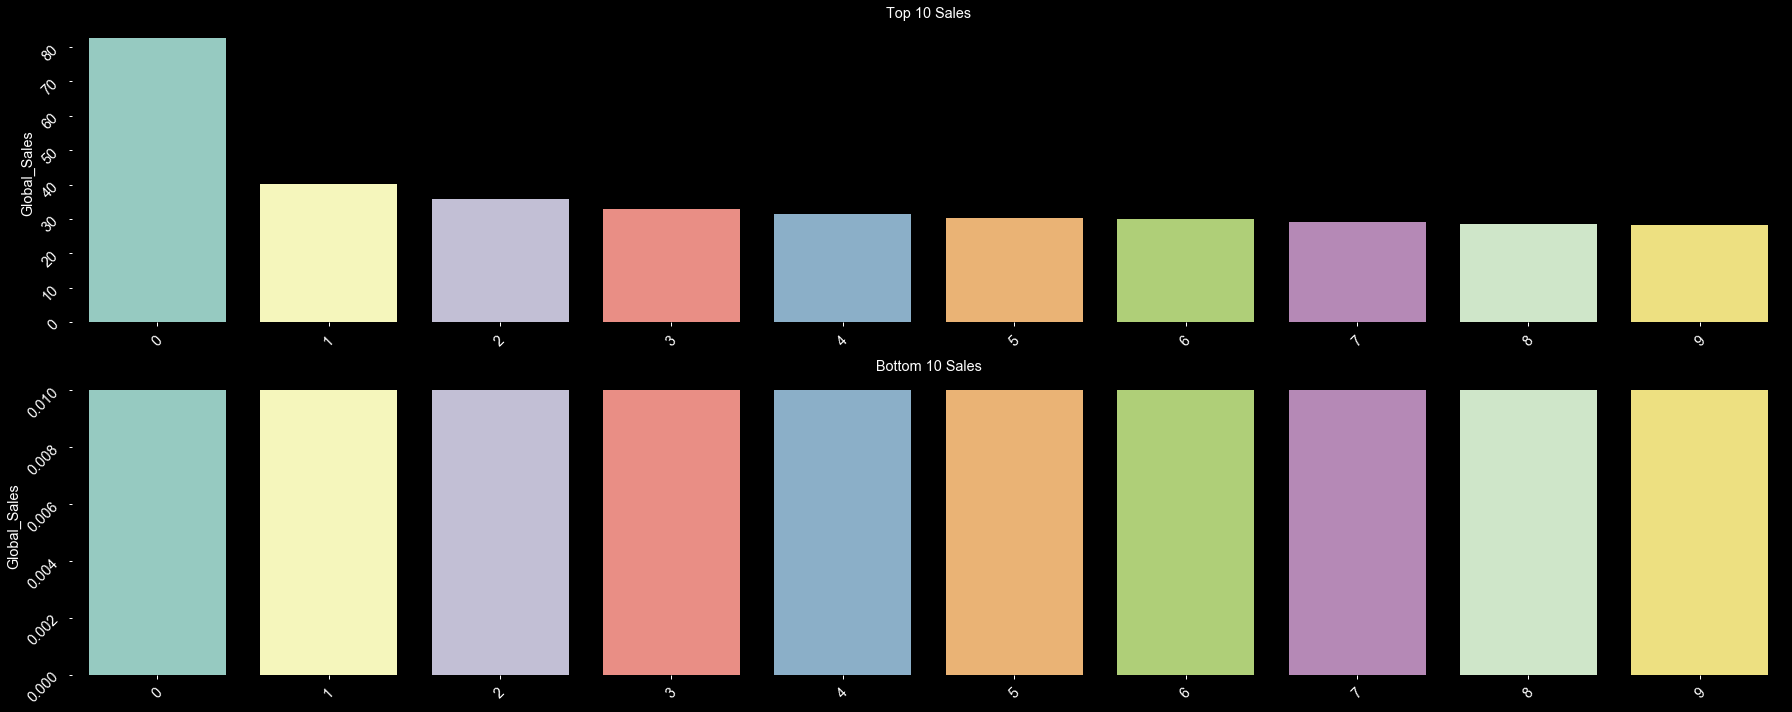

In [24]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(25, 10))
sns.barplot(x=list(range(10)), y='Global_Sales', data=df.head(10), ax=ax1)
sns.barplot(x=list(range(10)), y='Global_Sales', data=df.tail(10), ax=ax2)

ax1.tick_params(rotation=45)
ax1.set_title('Top 10 Sales')
ax2.tick_params(rotation=45)
ax2.set_title('Bottom 10 Sales')

plt.tight_layout()

# North America, EU, Japan, Other Sales.

In [25]:
num_plots = 4

cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

colors = ['#ffffff', '#0015ff', '#b51623', '#c27619']

titles = [
    "North America Top 10 Sales",
    "Eu Top 10 Sales",
    "Japan Top 10 Sales",
    "Other Top 10 Sales"
]

# North America, EU, Japan, Other Sales of Top 10 games.

In [26]:
data = list()

for col in cols:
    data.append(df.sort_values(by=col, ascending=False).head(10))

plots = [None] * num_plots

for i in range(len(plots)):
    plots[i] = figure(x_range=data[i]['Name'], plot_height=600, plot_width=850, title=titles[i],
                      toolbar_location=None, tools="hover", tooltips="$name: @$name M")

    spacing = -0.225
    for j in range(len(cols)):
        plots[i].vbar(x=dodge('Name', spacing, range=plots[i].x_range), top=cols[j], width=0.1, source=data[i],
                      color=colors[j], legend=value(cols[j]), name=cols[j])
        spacing += 0.15

    plots[i].xgrid.grid_line_color = None
    plots[i].xaxis.major_label_orientation = 'vertical'
    plots[i].y_range.start = 0

p, p0, p1, p2 = plots

show(column(p, p0, p1, p2))

# North America, Japan, Other Sales of Top 10 publishers.

In [27]:
data = list()

groups = df.groupby("Publisher")[
    'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'].sum().reset_index()

for col in cols:
    data.append(groups.sort_values(by=col, ascending=False).head(10))


plots = [None] * num_plots

for i in range(len(plots)):
    plots[i] = figure(x_range=data[i]['Publisher'], plot_height=600, plot_width=850, title=titles[i],
                      toolbar_location=None, tools="hover", tooltips="$name: @$name M")
    spacing = -0.225
    for j in range(len(cols)):
        plots[i].vbar(x=dodge('Publisher', spacing, range=plots[i].x_range), top=cols[j], width=0.1, source=data[i],
                      color=colors[j], legend=value(cols[j]), name=cols[j])
        spacing += 0.15

    plots[i].xgrid.grid_line_color = None
    plots[i].xaxis.major_label_orientation = 'vertical'
    plots[i].y_range.start = 0

p, p0, p1, p2 = plots

show(column(p, p0, p1, p2))

# North America, EU, Japan, Other Sales by Top 10 platforms.

In [28]:
data = list()

groups = df.groupby("Platform")[
    'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'].sum().reset_index()

for col in cols:
    data.append(groups.sort_values(by=col, ascending=False).head(10))

plots = [None] * num_plots

for i in range(len(plots)):
    plots[i] = figure(x_range=data[i]['Platform'], plot_height=600, plot_width=850, title=titles[i],
                      toolbar_location=None, tools="hover", tooltips="$name: @$name M")
    spacing = -0.225
    for j in range(len(cols)):
        plots[i].vbar(x=dodge('Platform', spacing, range=plots[i].x_range), top=cols[j], width=0.1, source=data[i],
                      color=colors[j], legend=value(cols[j]), name=cols[j])
        spacing += 0.15

    plots[i].xgrid.grid_line_color = None
    plots[i].xaxis.major_label_orientation = 'vertical'
    plots[i].y_range.start = 0

p, p0, p1, p2 = plots

show(column(p, p0, p1, p2))

# Counts.

# Count of games released by year.
> 2007 & 2008... nostalgia... nothing but MW2, a controller and time in my hands.

In [29]:
data = df.groupby('Year').size().reset_index(name='count')
data['Year'] = data['Year'].astype(str)

source = ColumnDataSource(data)

p = figure(x_range=data['Year'], plot_height=500,
           plot_width=850, title="Count by Year", tools=_tools_to_show)

p.vbar(x='Year', top='count', width=0.9, source=source)

p.xgrid.grid_line_color = None
p.xaxis.major_label_orientation = pi/4
p.y_range.start = 0

hover = p.select(dict(type=HoverTool))
hover.tooltips = [("Games Released", "@count")]

show(p)

# Count of games released by genre and platform.

In [30]:
num_plots = 2

cols, data = ["Genre", "Platform"], list()

plots = [None] * num_plots

for col in cols:
    data.append(df.groupby(col).size().reset_index(
        name='count').sort_values('count', ascending=False))


for i in range(len(plots)):
    source = ColumnDataSource(data[i])
    plots[i] = figure(x_range=data[i][cols[i]], plot_height=500, plot_width=850,
                      title=f"{cols[i]} count of games released since 1980", tools=_tools_to_show)

    plots[i].vbar(x=cols[i], top='count', width=0.9, source=source)

    plots[i].xgrid.grid_line_color = None
    plots[i].xaxis.major_label_orientation = pi/4
    plots[i].y_range.start = 0

    hover = plots[i].select(dict(type=HoverTool))
    hover.tooltips = [("Games Released", "@count")]

p, p1 = plots

show(column(p, p1))

# Genre with more than 150 games released by platform. 

In [31]:
data = df.groupby(['Genre', 'Platform']).filter(lambda x: len(x) > 150)

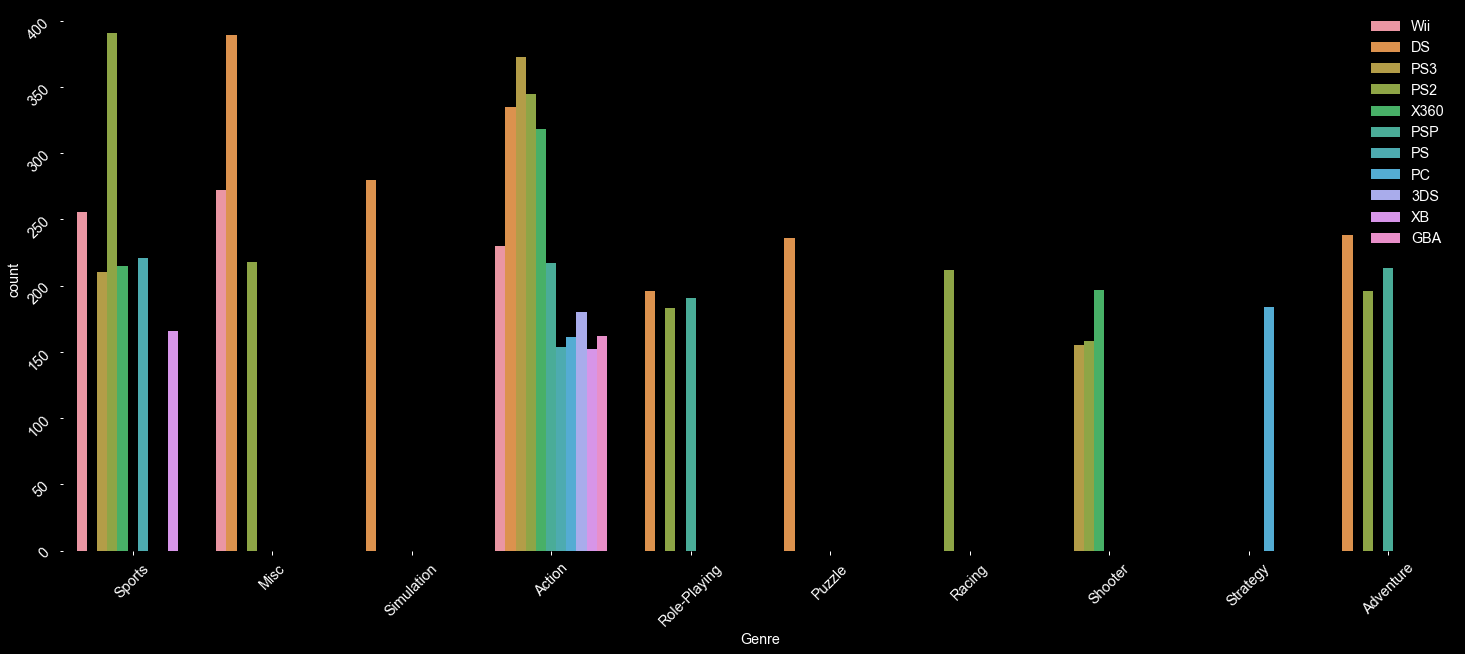

In [32]:
fig, ax = plt.subplots(figsize=(25, 10))
sns.countplot(x='Genre', data=data, hue='Platform')
leg = plt.legend(loc='upper right')

ax.tick_params(rotation=45)

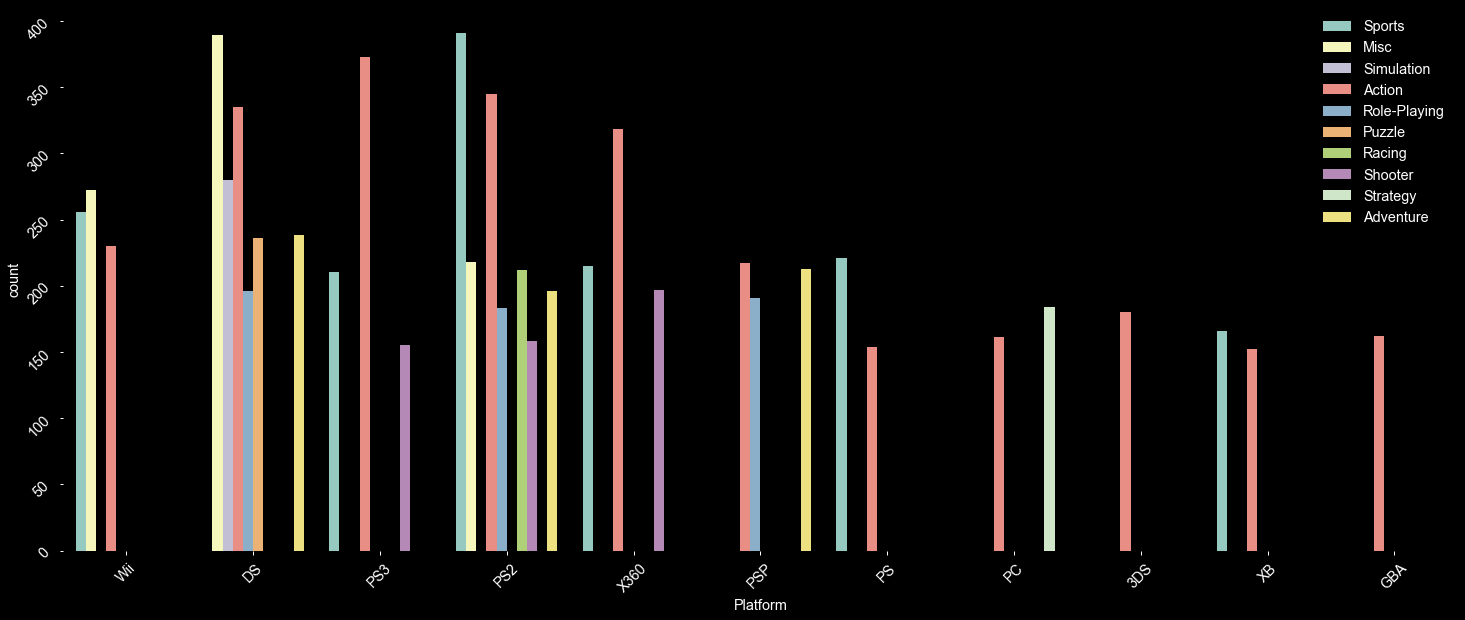

In [33]:
data = df.groupby(['Platform', 'Genre']).filter(lambda x: len(x) > 150)
fig, ax = plt.subplots(figsize=(25, 10))
sns.countplot(x='Platform', data=data, hue='Genre')
leg = plt.legend(loc='upper right')

ax.tick_params(rotation=45)

# Correlations between 'Global Sales' and other features above 0.5

In [34]:
corr = df.corr()

In [35]:
corr = corr[corr['Global_Sales'] > 0.5]

(5.0, 0)

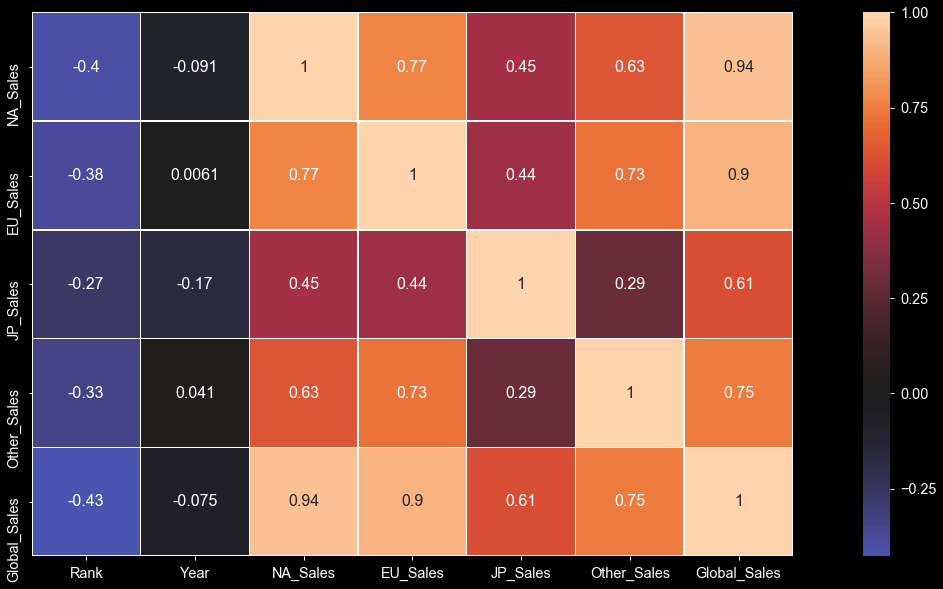

In [36]:
fig, ax = plt.subplots(figsize=(25, 10))
ax = sns.heatmap(corr, annot=True, linewidths=0.5, square=True,
                 annot_kws={"fontsize": 16}, center=0)
ax.set_ylim(5.0, 0)

In [39]:
# This is an example snippet!
# To create your own, add a new snippet block to the
# snippets.json file in your jupyter nbextensions directory:
# /nbextensions/snippets/snippets.json
import os
os.getcwd()

'C:\\Users\\rafaelbroseghini\\jupyter-notebooks\\video-game-sales'

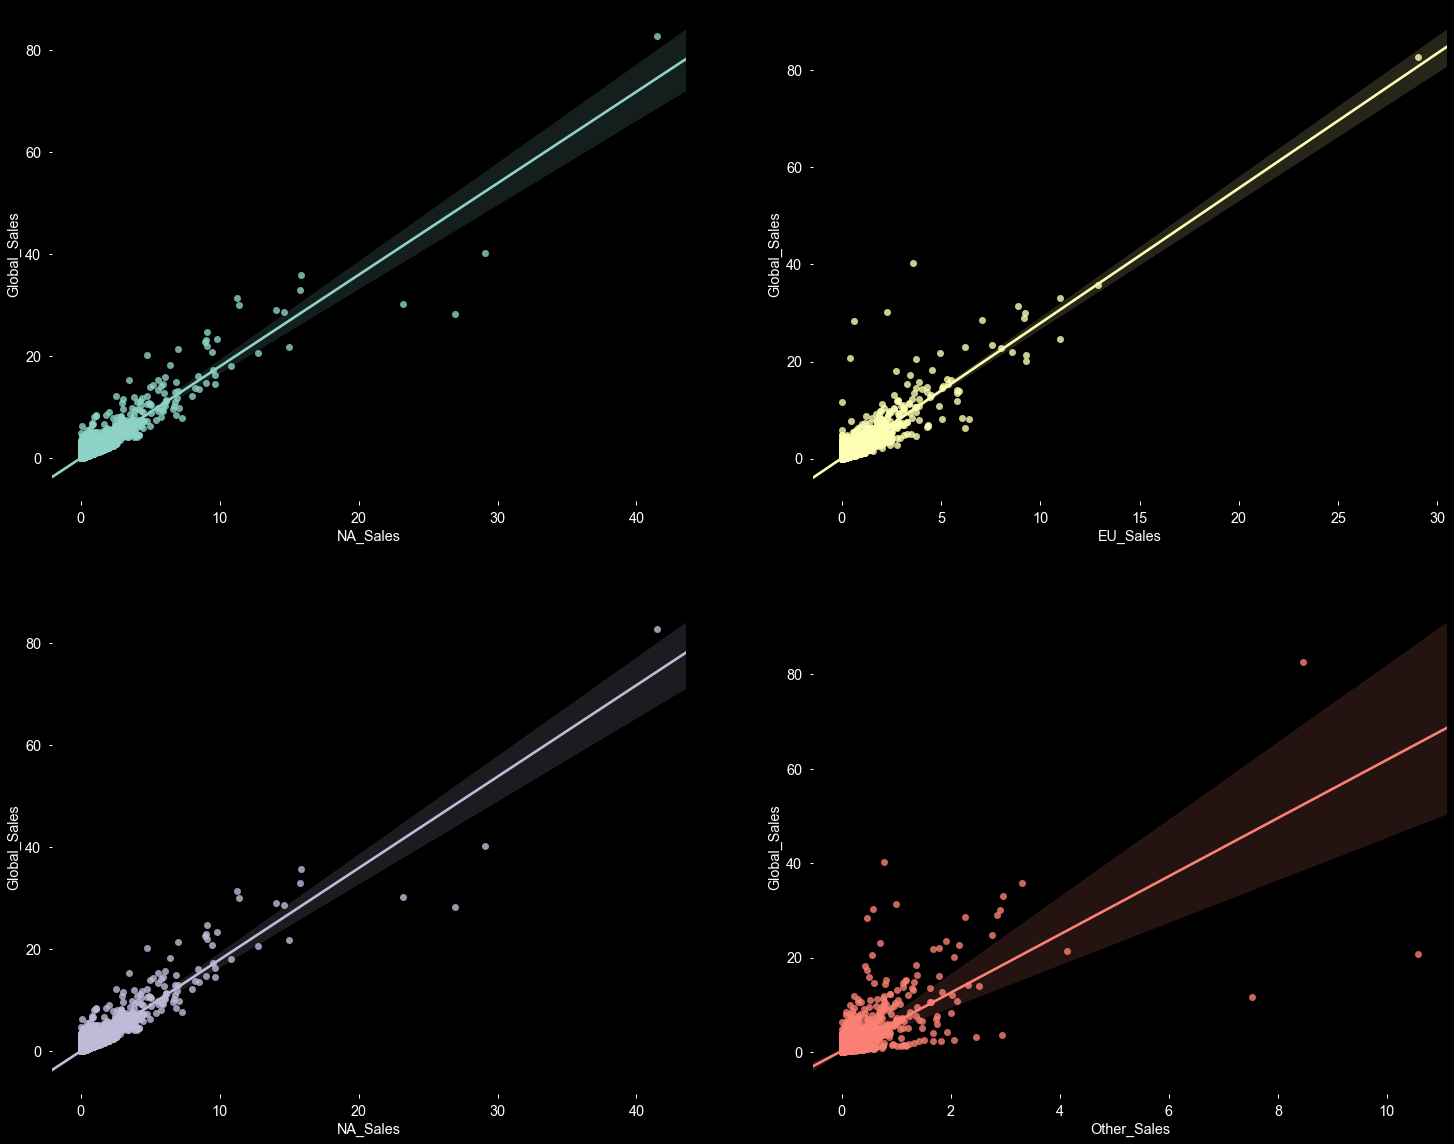

In [37]:
fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(25, 20))

sns.regplot('NA_Sales', 'Global_Sales', data=df, ax=ax1[0])
sns.regplot('EU_Sales', 'Global_Sales', data=df, ax=ax1[1])
sns.regplot('NA_Sales', 'Global_Sales', data=df, ax=ax2[0])
sns.regplot('Other_Sales', 'Global_Sales', data=df, ax=ax2[1])